# Хоть потоп

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

### Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import os
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Убрираем длинные циферки. Трех знаков после запятой будет достаточно.

In [3]:
pd.set_option('display.float_format', '{:,.3f}'.format)

In [4]:
# Отключаем лишние предупреждения
import warnings
warnings.filterwarnings('ignore')

### Функции

#### class protection_personal_data_clients

In [5]:
# protection_personal_data_clients = ppdc
class ppdc:
    '''
    Функция обучает линейную регрессию.
    '''
    def __init__(self, features, target):
        self.model = LinearRegression()
        self.preds = self.model.fit(features, target).predict(features)
        self.score = r2_score(target, self.preds)

#### float_equality

In [6]:
def float_equality(a, b, threshold=1e-12):
    '''
    Проверяет равеноство двух float с использованием порога.
    '''
    return np.abs(a - b) < threshold

#### df_info

In [7]:
def df_info(data_frame):
    '''
    Функция выводящая первичную информацию о DataFrame
    '''
    print('\nИнфо:')
    print(data_frame.info())                           # сколько значений и в каком формате
    print('\nПропусков:')
    print(data_frame.isna().mean())                    # подсчёт пропусков в долях (перевод в % - лишний код)
    print('\nОписание:')
    display(data_frame.describe())                     # вдруг чего "на глазок" проявится 
    print('\nДубликатов =', df.duplicated().sum()) # проверим дубликаты

### Таблица

Читаем файл с данными и сохраняем в df.

In [8]:
try:
    df_train = pd.read_csv('/datasets/insurance.csv')
except:
    ! gdown --id 15aBBk3C6IX4rjvGUwJzHA4kQ97QhRBOL
    df = pd.read_csv('/content/insurance.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15aBBk3C6IX4rjvGUwJzHA4kQ97QhRBOL
To: /content/insurance.csv
100% 95.7k/95.7k [00:00<00:00, 51.1MB/s]


Смотрим табличку.

In [9]:
display(df.columns)
print()
display(df.head())

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.000,"49,600.000",1,0
1,0,46.000,"38,000.000",1,1
2,0,29.000,"21,000.000",0,0
3,0,21.000,"41,700.000",2,0
4,1,28.000,"26,100.000",0,0


#### Инфо

Посмотрим заполненость таблицы.

In [10]:
df_info(df)


Инфо:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None

Пропусков:
Пол                 0.000
Возраст             0.000
Зарплата            0.000
Члены семьи         0.000
Страховые выплаты   0.000
dtype: float64

Описание:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,"5,000.000","5,000.000","5,000.000","5,000.000","5,000.000"
mean,0.499,30.953,"39,916.360",1.194,0.148
std,0.500,8.441,"9,900.084",1.091,0.463
min,0.000,18.000,"5,300.000",0.000,0.000
25%,0.000,24.000,"33,300.000",0.000,0.000
50%,0.000,30.000,"40,200.000",1.000,0.000
75%,1.000,37.000,"46,600.000",2.000,0.000
max,1.000,65.000,"79,000.000",6.000,5.000



Дубликатов = 153


In [11]:
print('Доля дубликатов было:', df.duplicated().sum()/len(df) * 100,'%')
#Избавимся от дубликатов
df= df.drop_duplicates()
print('Доля дубликатов стало:', df.duplicated().sum()/len(df) * 100,'%')

Доля дубликатов было: 3.06 %
Доля дубликатов стало: 0.0 %


Поменяем формат возраста и зарплаты на int, раз они такие и есть.

In [12]:
df['Возраст'] = df['Возраст'].astype(int)
df['Зарплата'] = df['Зарплата'].astype(int)
df.dtypes

Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object

#### Анализ данных

Отлавливаем артефакты в данных.

'Пол:'

array([0, 1])

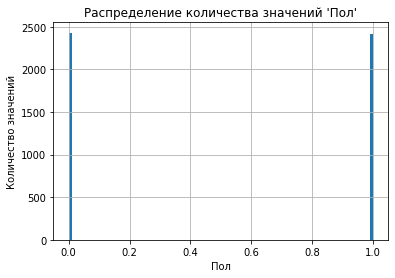

In [13]:
display('Пол:', df['Пол'].sort_values().unique())
display(df['Пол'].hist(bins=100))
plt.title("Распределение количества значений 'Пол'")
plt.xlabel("Пол")
plt.ylabel("Количество значений")
plt.show()

'Возраст:'

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65])

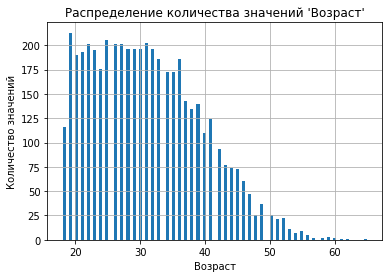

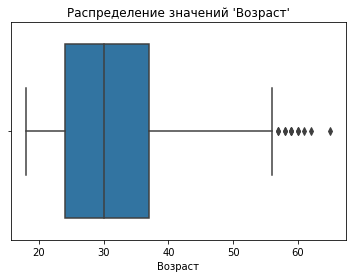

In [14]:
display('Возраст:', df['Возраст'].sort_values().unique())
print()
display(df['Возраст'].hist(bins=100))
plt.title("Распределение количества значений 'Возраст'")
plt.xlabel("Возраст")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'Возраст',
                         orient = 'h'))
plt.title("Распределение значений 'Возраст'")
plt.xlabel("Возраст")
plt.show()

'Зарплата:'

array([ 5300,  6000,  7400,  8900,  9800, 10000, 10600, 10800, 11000,
       11200, 11300, 12200, 12900, 13000, 13200, 13300, 13400, 13500,
       13800, 13900, 14100, 14300, 14400, 14500, 14600, 14700, 15000,
       15100, 15200, 15600, 15700, 15900, 16000, 16200, 16300, 16400,
       16500, 16600, 16700, 17000, 17100, 17300, 17400, 17500, 17600,
       17700, 17800, 17900, 18100, 18200, 18300, 18400, 18600, 18700,
       18800, 18900, 19000, 19100, 19200, 19300, 19400, 19600, 19700,
       19900, 20000, 20100, 20200, 20300, 20400, 20500, 20600, 20700,
       20800, 20900, 21000, 21100, 21200, 21300, 21400, 21500, 21600,
       21700, 21800, 21900, 22000, 22100, 22200, 22300, 22500, 22600,
       22700, 22800, 22900, 23000, 23100, 23200, 23300, 23400, 23500,
       23600, 23700, 23800, 23900, 24000, 24100, 24200, 24300, 24400,
       24500, 24600, 24700, 24800, 24900, 25000, 25100, 25200, 25300,
       25400, 25500, 25600, 25700, 25800, 25900, 26000, 26100, 26200,
       26300, 26400,

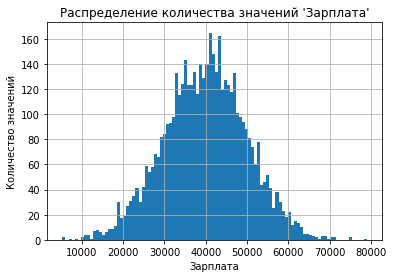

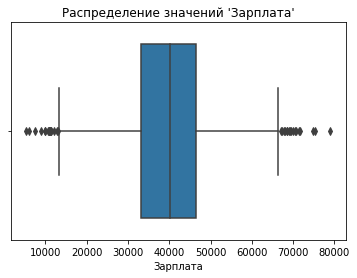

In [15]:
display('Зарплата:', df['Зарплата'].sort_values().unique())
print()
display(df['Зарплата'].hist(bins=100))
plt.title("Распределение количества значений 'Зарплата'")
plt.xlabel("Зарплата")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'Зарплата',
                         orient = 'h'))
plt.title("Распределение значений 'Зарплата'")
plt.xlabel("Зарплата")
plt.show()

'Члены семьи:'

array([0, 1, 2, 3, 4, 5, 6])

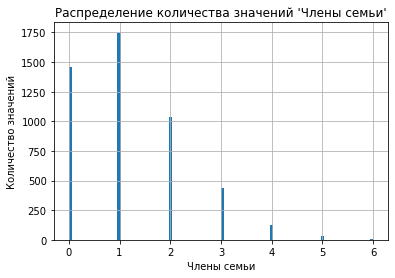

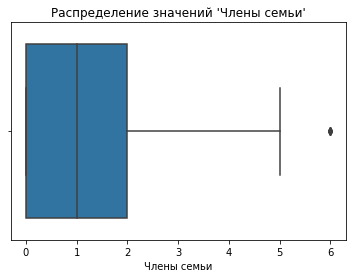

In [16]:
display('Члены семьи:', df['Члены семьи'].sort_values().unique())
print()
display(df['Члены семьи'].hist(bins=100))
plt.title("Распределение количества значений 'Члены семьи'")
plt.xlabel("Члены семьи")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'Члены семьи',
                         orient = 'h'))
plt.title("Распределение значений 'Члены семьи'")
plt.xlabel("Члены семьи")
plt.show()

'Страховые выплаты:'

array([0, 1, 2, 3, 4, 5])

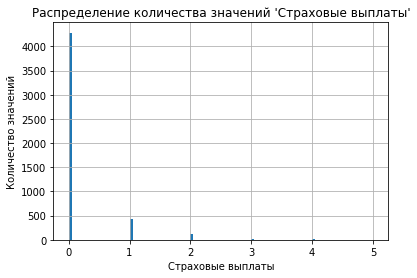

In [17]:
display('Страховые выплаты:', df['Страховые выплаты'].sort_values().unique())
print()
display(df['Страховые выплаты'].hist(bins=100))
plt.title("Распределение количества значений 'Страховые выплаты'")
plt.xlabel("Страховые выплаты")
plt.ylabel("Количество значений")
plt.show()

Посмотрим корреляцию признаков.

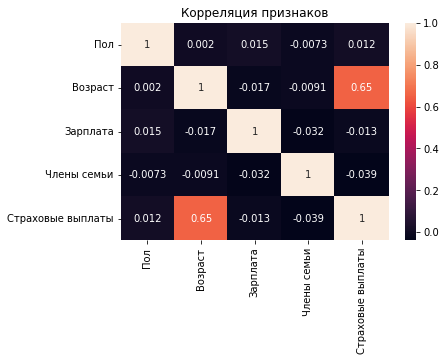

In [18]:
sns.heatmap(df.corr(), annot=True)
plt.title('Корреляция признаков')
plt.show()

Влияние возраста на выплаты на 1-2 порядка сильнее остальных признаков. Построим диаграмму рассеяния:

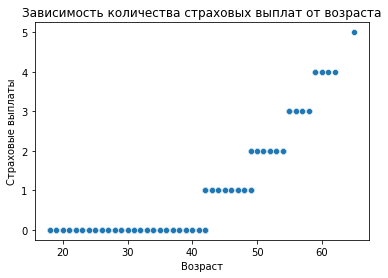

In [19]:
sns.scatterplot(data = df,
                x = 'Возраст',
                y = 'Страховые выплаты')
plt.title('Зависимость количества страховых выплат от возраста')
plt.show()

До 43 лет страховка - пустая трата денег?

А чего вообще с выплатами?

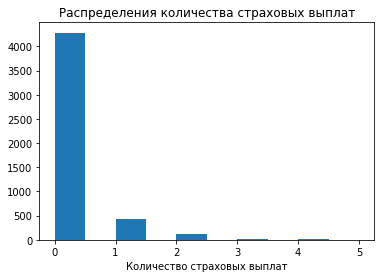

,Количество выплат,%
Страховые выплаты,,
0,4284,88.385
1,423,8.727
2,114,2.352
3,18,0.371
4,7,0.144
5,1,0.021


In [20]:
plt.hist(df['Страховые выплаты'])
plt.xlabel('Количество страховых выплат')
plt.title('Распределения количества страховых выплат')
plt.show()

df_pivot = pd.pivot_table(df,
                          index = ['Страховые выплаты'],
                          values = ["Возраст"],
                          aggfunc = len)
df_pivot.rename(columns = {'Возраст': 'Количество выплат'},
                inplace=True)
df_pivot['%'] = df_pivot['Количество выплат'] / df_pivot['Количество выплат'].sum() * 100
display(df_pivot)
#display(df_pivot.columns)

Дорогая страховочка наверное? Больше 11% выплат.

### Вывод

Имеем всего 5000 значений.

Пропусков нет.

Дубликатов 153. Было.

В значениях аномалий не наблюдается.

## Умножение матриц

### Вопрос

Ответьте на вопрос и обоснуйте решение.
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

    a. Изменится. Приведите примеры матриц.
    b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

    
### Ответ 

Предсказания модели не изменится.

Если умножить параметры линейной регрессии на обратимую матрицу, качество линейной регрессии не изменится.

### Обоснование 
    
Формула расчета весов для линейной регрессии:

$$
w = (X^T X)^{-1} X^T y
$$

Новую матрицу признаков $X_n$ представим как произведение старой $X$ на обратимую матрицу $P$:

$$
X_n = XP
$$

Подставим новое значение $X_n$ в формулу расчета весов:

$$
w_n = ((XP)^T XP)^{-1} (XP)^T y
$$

Т.к. $(XP)^T = X^T P^T$ получаем:

$$
w_n = (X^T P^T XP)^{-1} X^T P^T y
$$

Перегруппируем множители и раскроем скобки:

$$
w_n = (P (X^T X) P^T)^{-1} P^T X^T y
$$

$$
w_n = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Так как $P$ обратимая матрица, то произведение $(P^T)^{-1} P^T$ равно единичной матрице $E$:

$$
w_n = P^{-1} (X^T X)^{-1} E X^T y
$$

$$
w_n = P^{-1} (X^T X)^{-1} X^T y
$$

Справа получилась формула для расчета весов:

$$
w_n = P^{-1} (X^T X)^{-1} X^T y
$$

$$
w_n = P^{-1} w
$$


Формула для предсказаний линейной регрессии:

$$
a = X w
$$

Подставим в эту формулу значения $X_n$ и $w_n$ для вычисления предсказания модели $a_n$:

$$
a_n = X_n w_n
$$

$$
a_n = X P P^{-1} w
$$

Так как $P$ обратимая, то $P P^{-1}$ = $E$:

$$
a_n = X E w
$$

$$
a_n = X w
$$

$$
a_n = a
$$

Получается, что предсказания $a_n$ для матрицы признаков, умноженных на обратимую матрицу $P$ равны предсказаниям $a$.

Параметры линейной регрессии в исходной $w$ и преобразованной $w_n$ связаны следующим образом:

$$
w_n = P^{-1} w
$$

## Алгоритм преобразования

### Алгоритм

1.   Разделить данные на признаки и целевой признак.
2.   Зафиксировать качество регрессии на исходных данных.
3.   Создать произвольную квадратную матрицу для преобразования признаков. (Обеспечить повторяемость опыта.)
4.   Получить новые признаки через произвольную матрицу.
5.   Обучить линейную регрессию на новых признаках.
6.   Провести сравнение качества моделей до и после преобразования.

## Проверка алгоритма

### Реализация алгоритма

Разделим данные на признаки и целевой признак.

In [21]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Преобразуем их в векторы.

In [22]:
features_vector = features.values
target_vector = np.array(target)
features_vector, target_vector

print('\ntarget_vector:\n', target_vector)
print('\nfeatures_vector:\n', features_vector)
print('\nРазмер target_vector:', target_vector.shape)
print('\nРазмер features_vector:', features_vector.shape)


target_vector:
 [0 1 0 ... 0 0 0]

features_vector:
 [[    1    41 49600     1]
 [    0    46 38000     1]
 [    0    29 21000     0]
 ...
 [    0    20 33900     2]
 [    1    22 32700     3]
 [    1    28 40600     1]]

Размер target_vector: (4847,)

Размер features_vector: (4847, 4)


Фиксируем качество регрессии на исходных данных.

In [23]:
r2_X = ppdc(features_vector,
            target_vector)
r2_X_score = r2_X.score
print('\nНа исходных данных регрессия даёт R2 =', r2_X_score)


На исходных данных регрессия даёт R2 = 0.4302010046633359


Обеспечиваем повторяемость опыта.

In [24]:
np.random.seed(1980)

Создаем квадратную матрицу для преобразования.

Сторона квадрата равна количеству признаков.

In [25]:
P = np.random.randint(100,
                      size = (features_vector.shape[1],
                              features_vector.shape[1]))
P

array([[ 0, 43, 99, 17],
       [24, 54, 68, 18],
       [89, 91, 53, 67],
       [65, 36, 49, 18]])

Проверяем P на обратимость.

In [26]:
try:
    P_inv = np.linalg.inv(P)
    print('\nМатрица обратима\n')
    print(P_inv)
except:
    print('\nМатрица не обратима\n')


Матрица обратима

[[-0.00588291 -0.00428984 -0.00302705  0.02111329]
 [-0.03194705  0.06227876 -0.00387223 -0.01769327]
 [ 0.01757092 -0.01562638 -0.00286364  0.00969072]
 [ 0.037306   -0.06652797  0.02647094 -0.01168066]]


Получаем новые признаки через матрицу P.

In [27]:
X = features_vector    # это чтобы с теорией одинаковые буквы были
y = target_vector
X_n = X @ P

print('\nРазмер X_n:', X_n.shape)
print('\nX:\n', X[:5])
print('\nX_n:\n', X_n[:5])

# за минусом 153 дубликатов


Размер X_n: (4847, 4)

X:
 [[    1    41 49600     1]
 [    0    46 38000     1]
 [    0    29 21000     0]
 [    0    21 41700     2]
 [    1    28 26100     0]]

X_n:
 [[4415449 4515893 2631736 3323973]
 [3383169 3460520 2017177 2546846]
 [1869696 1912566 1114972 1407522]
 [3711934 3795906 2211626 2794314]
 [2323572 2376655 1385303 1749221]]


Обучим линейную регрессию на новых признаках.

In [28]:
r2_X_n = ppdc(X_n, y)
r2_X_n_score = r2_X_n.score
print('\nНа измененных данных регрессия даёт R2 =', r2_X_n_score)


На измененных данных регрессия даёт R2 = 0.4302010046632996


### Сравнение качества моделей до и после преобразования

Сравним совпадение r2_X и r2_X_n до 12-го знака после запятой.

In [29]:
float_equality(r2_X_n_score,
               r2_X_score)

True

Точность предсказаний не пострадала.

Веса модели, обученной на исходных признаках.

In [30]:
w_X = r2_X.model.coef_

Веса модели, обученной на изменённых признаках.

In [31]:
w_X_n = r2_X_n.model.coef_

Умножим матрицу P^-1 на вектор обычных весов и сравним с изменённым вектором весов.

In [32]:
all(float_equality(P_inv @ w_X,
                   w_X_n))

True

Векторы весов совпали.

## Вывод

Цель проекта достигнута:

    - Разработан и реализован алгоритм преобразования данных клиентов страховой компании «Хоть потоп» так, чтобы по ним было сложно восстановить персональную информацию.
    - Корректность работы алгоритма проверена. Точность результатов работы алгоритма не менее 12 знаков после запятой.